In [6]:
%run modules.ipynb
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [7]:
# PLOTTING SETTINGS

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15
WIDTH = 500 # could modify later

from matplotlib import gridspec
#from brokenaxes import brokenaxes
import os

plt.rc('font', size=15, family='sans-serif', serif='Arial') # controls default text sizes
plt.rc('lines', linewidth=2) # make lines thicker
plt.rc('axes', linewidth=1)
plt.rc('xtick', labelsize = 15)

def set_size(width, scale=1, fraction = 1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * scale

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio / fraction

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [8]:
# LOAD THE DATA
import os
allInputs = []
allOutputs = []
for Nr in [2, 3, 4, 5, 6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 101):
        outputFileName = 'nutrient preference data\SpeciesPoolSizeFixed_Nr=2,3,4,5,6_2020_8_1\outputs_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        inputFileName = 'nutrient preference data\SpeciesPoolSizeFixed_Nr=2,3,4,5,6_2020_8_1\input_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)
            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([2, 3, 4, 5, 6])):
    Size = int(20 * factorial(6) / factorial(Nr))
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(2+Nr)*Size)
                n_reentrance[-1] += 1

## Secondary extinctions
Secondary extinction (or any other better name) refers to the system's diversity decreasing after invasions. Like the word diauxie, this should also include more than 2 species extincted. The investigation on secondary extinctions has 2 motivations:

- To form up a narrative on complementarity staying high (and not falling down as there are more and more invasions), we need to investigate the assembly process more in detail.
- The first panel in fig 3 now seems to give a false feeling that invasions always increase the diversity. If you really think about it, we actually don't have the data of the case otherwise.

### When do these happen?

- The change in diversity per successful invasion vs. time
- Divided down to each case (+1, +0, -1, -2,..etc.)

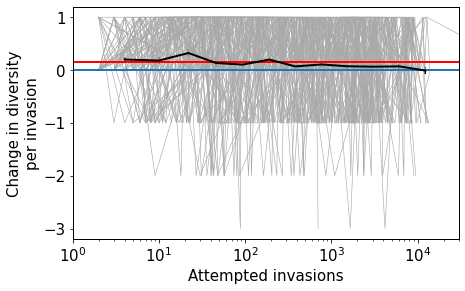

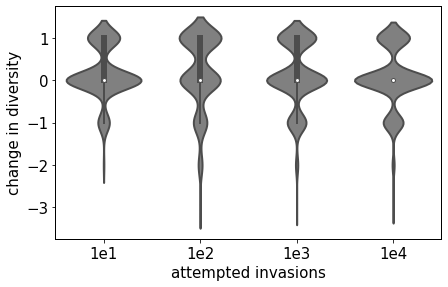

In [65]:
Nr = 4
Size = int(20 * factorial(6) / factorial(Nr))
preference_list = list(itertools.permutations(range(Nr), Nr))

fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH))
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])

def slotsEvaluation(slotcuts, axis, xs, func, spaghettis = True, errorbar = True, align = 'center', **kwargs_of_func): # given the data and the slots, return the spaghetti plot and the errorbar plot created by x-slots.
    global kwargs_of_spaghetti
    global kwargs_of_errorbar
    # generate the ycoordinates and do the spaghetti plots
    plt.sca(axis)
    ys = [func(xcoords_idx, xcoords, **kwargs_of_func) for xcoords_idx, xcoords in enumerate(xs)]
    # the function "func" takes in a list of xcoords and other info and returns a list of ycoords. 
    if spaghettis == True:
        for idx in range(len(xs)):
            #print(xs[idx][1:], ys[idx])
            plt.plot(xs[idx][1:], ys[idx], **kwargs_of_spaghetti)
    # get the stats and do a average +- SEM
    ycoordInSlots = []
    for slotidx, slotbegin in enumerate(slotcuts[:-1]):
        ycoordInSlots.append([])
        slotend = slotcuts[slotidx + 1]
        for xcoords_idx, xcoords in enumerate(xs):
            for idx, i in enumerate(xcoords[1:]):
                if(slotbegin <= i < slotend):
                    ycoordInSlots[-1].append(ys[xcoords_idx][idx])
    thickMeans = [np.mean(i) for i in ycoordInSlots]
    thickSEMs = [np.std(i)/sqrt(len(i)) for i in ycoordInSlots]
    if(align == 'center'):
        if errorbar == True:
            plt.errorbar([(slotcuts[i] + slotcuts[i+1]) / 2 for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([(slotcuts[i] + slotcuts[i+1]) / 2 for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    elif(align == 'leftedge'):
        if errorbar == True:
            plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    elif(align == 'rightedge'):
        if errorbar == True:
            plt.errorbar([slotcuts[i+1] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([slotcuts[i+1] for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    return ys, ycoordInSlots

# first create the global slots for all the time series data
d = 2
gap = 1
summed = 0
slots = []
thrs = []
while(summed < max([i[-2] for i in invasionOrdersTime[Nr-7]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = [0] + thrs[:-1]
#thrs.append(max([i[-2] for i in invasionOrdersTime[-1]])) 
xs = []
for outputidx, output6 in enumerate(allOutputs[Nr-7]):
    xs.append([i + 1 for i in invasionOrdersTime[Nr-7][outputidx][:-1]])

# the diversities
def diversities(xcoords_idx, xcoords, outputsDataset, Measure):
    data = outputsDataset[xcoords_idx]['details'][-2]
    return [Measure(snapshot[-1]) for snapshot in data][:-1]

def Diffdiversities(xcoords_idx, xcoords, outputsDataset, Measure):
    data = outputsDataset[xcoords_idx]['details'][-2]
    prev = [Measure(snapshot[-1]) for snapshot in data][:-2]
    later = [Measure(snapshot[-1]) for snapshot in data][1:-1]
    return [j - i for i, j in zip(prev, later)]

# this is the diversity measured in inverse simpsons index
def simpsonEvenness(L):
    normalizedL  = [i/sum(L) for i in L]
    return 1/(sum([i**2 for i in normalizedL]))
# this is the diversity measured in number of species
def Nspecies(L):
    return len(L)

kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
ys, ycoordInSlots = slotsEvaluation(thrs, ax1, xs, Diffdiversities, spaghettis = True, errorbar = True, outputsDataset = allOutputs[Nr-7], Measure = Nspecies)
ax1.set_xscale('log')
ax1.set_xlabel('Attempted invasions')
ax1.set_ylabel('Change in diversity\nper invasion', fontsize = 15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlim([1, 3e4])
ax1.axhline(3.5/24, color = 'r')
ax1.axhline(0)

plt.show()

thrs = [0, 10, 100, 1000, 10000]
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH))
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])
ys, ycoordInSlots = slotsEvaluation(thrs, ax1, xs, Diffdiversities, spaghettis = False, errorbar = False, outputsDataset = allOutputs[Nr-7], Measure = Nspecies)
ax1 = sns.violinplot(x = sum([[thrs[idx] for j in i] for idx, i in enumerate(ycoordInSlots)], []), y = sum(ycoordInSlots, []), color = '#808080')
#plt.xscale('log')
ax1.set_xticklabels(['1e1', '1e2', '1e3', '1e4'])
ax1.set_xlabel('attempted invasions')
ax1.set_ylabel('change in diversity')
plt.show()

(Top)

- We can see that at the beginning the increase in diversity per invasion is better than all time average, and later it slowly drops, as one would have expected. 
- But it is always (though not very significantly) over zero. This suggests that It has not reached saturation. 

(Bottom)

- Interesting that the "competitive invader"(invader that does not increase diversity, as defined months earlier) are high for both earliest and latest stage. The increasing trend for later phase is expected, and for the very early behavior, I believe it's just because you need many one-by-one replacements to get a real champion/expert with actual "expertise".  

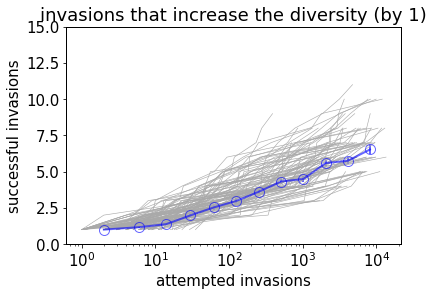

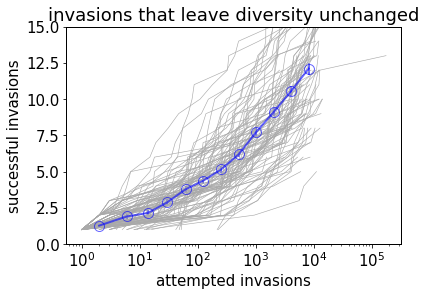

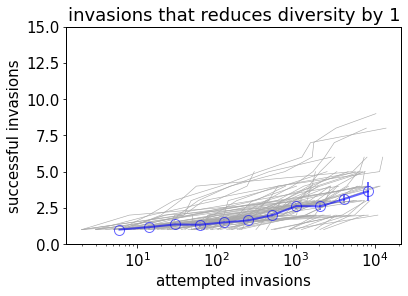

In [11]:
xs = []
for outputidx, output6 in enumerate(allOutputs[Nr-7]):
    xs.append([i + 1 for i in invasionOrdersTime[Nr-7][outputidx][:-1]])
d = 2
gap = 1
summed = 0
slots = []
thrs = []
while(summed < max([i[-2] for i in invasionOrdersTime[Nr-7]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = [0] + thrs[:-1]
slotcuts = thrs

xp1s = [[j for j in i] for i in xs]
for xcoords_idx, lst in enumerate(xp1s):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 1):
            a = xs[xcoords_idx][idx]
            xp1s[xcoords_idx].remove(a)   
kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
ys = []
for idx in range(len(allOutputs[Nr-7])):
    ys.append(range(1, 1+len(xp1s[idx])))
    plt.plot(xp1s[idx], range(1, 1+len(xp1s[idx])), **kwargs_of_spaghetti)
    plt.xscale('log')
    plt.ylim(0, 15)
    plt.xlabel('attempted invasions')
    plt.ylabel('successful invasions')
ycoordInSlots = []
for slotidx, slotbegin in enumerate(slotcuts[:-1]):
    ycoordInSlots.append([])
    slotend = slotcuts[slotidx + 1]
    for xcoords_idx, xcoords in enumerate(xp1s):
        for idx, i in enumerate(xcoords[1:]):
            if(slotbegin <= i < slotend):
                ycoordInSlots[-1].append(ys[xcoords_idx][idx])
thickMeans = [np.mean(i) for i in ycoordInSlots]
thickSEMs = [np.std(i)/sqrt(len(i)) for i in ycoordInSlots]
kwargs_of_errorbar = {'color': 'b', 'alpha':0.6, "label": 'Second choice', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
plt.title('invasions that increase the diversity (by 1)')
plt.show()

xp0s = [[j for j in i] for i in xs]
xdiffs = xp0s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 0):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
ys = []
for idx in range(len(allOutputs[Nr-7])):
    ys.append(range(1, 1+len(xdiffs[idx])))
    plt.plot(xdiffs[idx], range(1, 1+len(xdiffs[idx])), **kwargs_of_spaghetti)
    plt.xscale('log')
    plt.ylim(0, 15)
    plt.xlabel('attempted invasions')
    plt.ylabel('successful invasions')
ycoordInSlots = []
for slotidx, slotbegin in enumerate(slotcuts[:-1]):
    ycoordInSlots.append([])
    slotend = slotcuts[slotidx + 1]
    for xcoords_idx, xcoords in enumerate(xdiffs):
        for idx, i in enumerate(xcoords[1:]):
            if(slotbegin <= i < slotend):
                ycoordInSlots[-1].append(ys[xcoords_idx][idx])
thickMeans = [np.mean(i) for i in ycoordInSlots]
thickSEMs = [np.std(i)/sqrt(len(i)) for i in ycoordInSlots]
kwargs_of_errorbar = {'color': 'b', 'alpha':0.6, "label": 'Second choice', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
plt.title('invasions that leave diversity unchanged')
plt.show()

xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != -1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
ys = []
for idx in range(len(allOutputs[Nr-7])):
    ys.append(range(1, 1+len(xdiffs[idx])))
    plt.plot(xdiffs[idx], range(1, 1+len(xdiffs[idx])), **kwargs_of_spaghetti)
    plt.xscale('log')
    plt.ylim(0, 15)
    plt.xlabel('attempted invasions')
    plt.ylabel('successful invasions')
ycoordInSlots = []
for slotidx, slotbegin in enumerate(slotcuts[:-1]):
    ycoordInSlots.append([])
    slotend = slotcuts[slotidx + 1]
    for xcoords_idx, xcoords in enumerate(xdiffs):
        for idx, i in enumerate(xcoords[1:]):
            if(slotbegin <= i < slotend):
                ycoordInSlots[-1].append(ys[xcoords_idx][idx])
thickMeans = [np.mean(i) for i in ycoordInSlots]
thickSEMs = [np.std(i)/sqrt(len(i)) for i in ycoordInSlots]
kwargs_of_errorbar = {'color': 'b', 'alpha':0.6, "label": 'Second choice', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
plt.title('invasions that reduces diversity by 1')
plt.show()

### Where do the invaders invade (what are their top choice's depletion ranks?)

Guess: peaceful invaders (That increases the diversity) invades at later depleted sources, and competitive invaders would relatively pick some earlier depleted resources. If a bug causes some secondary extinction, it might be because they replace some more powerful champions (either by kicking them out, or by simply being so good at its top choice), such as the one that switches first. It does not necessarily have the same depletion order with the old king on other resources, so it would reshape the overall depletion order, and may drive some of the old vassals away. 

In [29]:
def barnormed(ax, data, norm=1, **kwargs):
    plt.sca(ax)
    counts = [data.count(element) for element in set(data)]
    counts_normed = [norm * i/sum(counts) for i in counts]
    plt.bar(list(set(data)), counts_normed, **kwargs)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


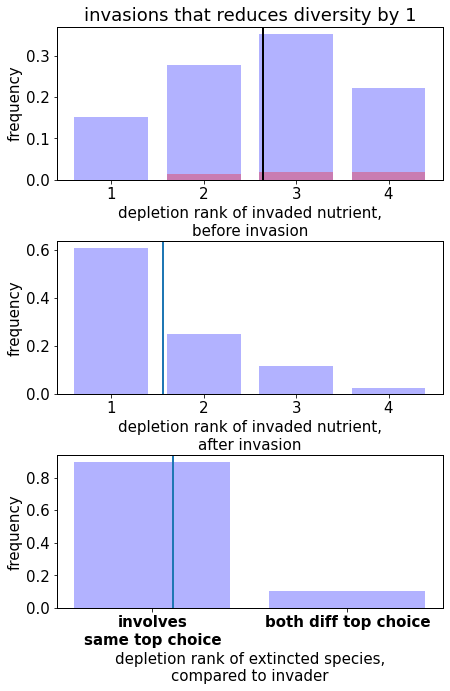

In [63]:
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=0.4))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=0.4) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[2, 0])

xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != -1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)

invaderPrefOrder = []
depletionBefore = []
extinctBugPrefOrder = []
depletionAfter = []
jumps = []
occupancy = []
cutoff = 150
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            invaderPrefOrder.append(preference_list[invader // Size])
            
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            
            bugsBefore = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            bugsAfter = allOutputs[Nr-7][xcoords_idx]['details'][1][step+1]
            extinctBug = [bug for bug in bugsBefore if bug not in bugsAfter]
            extinctBugPrefOrder.append([preference_list[bug//Size] for bug in extinctBug])
            
            invaderTopChoice = preference_list[invader // Size][0]
            jumps.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1].index(invaderTopChoice) - allOutputs[Nr-7][xcoords_idx]['details'][2][step].index(invaderTopChoice))
            
            claimed = [preference_list[bug // Size][0] for bug in bugsBefore]
            occupancy.append(invaderTopChoice in claimed)
        
invadedRes = [depletionBefore[idx].index(i) for idx, i in enumerate([j[0] for j in invaderPrefOrder])]
UnclaimedInvRes = [invadedRes[idx] for idx,i in enumerate(occupancy) if i == 0]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax1, invadedRes, **kwargs)
kwargs = {'color':'r', 'alpha': 0.3}
barnormed(ax1, UnclaimedInvRes, norm = len(UnclaimedInvRes)/len(invadedRes), **kwargs)
#sns.distplot(invadedRes, norm_hist=1, kde = 0, ax = ax1)
ax1.set_xlabel('depletion rank of invaded nutrient,\nbefore invasion')
ax1.set_ylabel('frequency')
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels([1, 2, 3, 4])
ax1.axvline(np.mean(invadedRes), color = 'k')
ax1.set_title("invasions that reduces diversity by 1")

invInNewDep = [depletionAfter[idx].index(i) for idx, i in enumerate([j[0] for j in invaderPrefOrder])]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax2, invInNewDep, **kwargs)
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels([1, 2, 3, 4])
ax2.set_xlabel('depletion rank of invaded nutrient,\nafter invasion')
ax2.set_ylabel('frequency')
ax2.axvline(np.mean(invInNewDep))

# sns.distplot(rankOfG1, norm_hist=1, kde = 0, ax = ax3)
# ax2.set_xlabel('rank of invader\'s top choice growth rate')
# ax3.set_ylabel('frequency')
# ax3.axvline(np.mean(rankOfG1))

# victimDiff = []
# for idx, i in enumerate([j[0] for j in invaderPrefOrder]):
#     for lst in extinctBugPrefOrder[idx]:
#         victimDiff.append(-depletionBefore[idx].index(lst[0]) + depletionBefore[idx].index(i))
# victimDiff = [i != 0 for i in victimDiff]

for idx, i in enumerate([j[0] for j in invaderPrefOrder]):
    victimDiff.append(1)
    for lst in extinctBugPrefOrder[idx]:
        temp = -depletionBefore[idx].index(lst[0]) + depletionBefore[idx].index(i)
        victimDiff[-1] = victimDiff[-1] & (temp != 0)

kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax3, victimDiff, **kwargs)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['involves\nsame top choice', 'both diff top choice'], fontweight = 'bold')
ax3.set_xlabel('depletion rank of extincted species,\ncompared to invader')
ax3.set_ylabel('frequency')
ax3.axvline(np.mean(victimDiff))

# sns.distplot(jumps, norm_hist=1, kde = 0, ax = ax3, bins=8)
# ax3.set_xlabel('jump forward of invader\'s top choice')
# ax3.set_ylabel('frequency')
# ax3.axvline(np.mean(jumps))

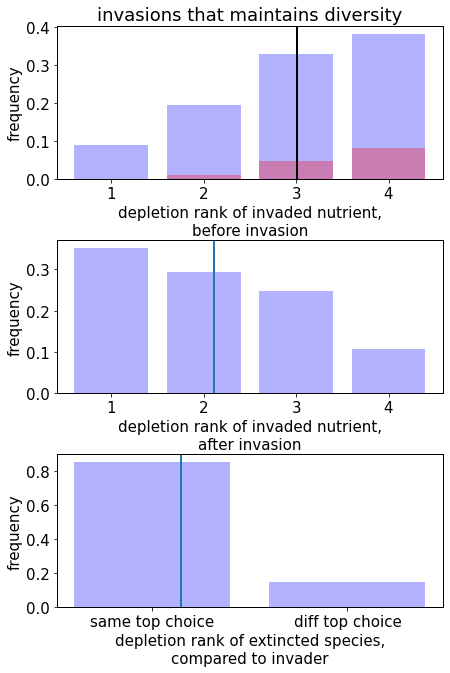

In [57]:
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=0.4))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=0.4) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[2, 0])

xp0s = [[j for j in i] for i in xs]
xdiffs = xp0s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 0):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)

invaderPrefOrder = []
depletionBefore = []
extinctBugPrefOrder = []
depletionAfter = []
jumps = []
occupancy = []
cutoff = 150
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            invaderPrefOrder.append(preference_list[invader // Size])
            
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            
            bugsBefore = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            bugsAfter = allOutputs[Nr-7][xcoords_idx]['details'][1][step+1]
            extinctBug = [bug for bug in bugsBefore if bug not in bugsAfter]
            extinctBugPrefOrder.append([preference_list[bug//Size] for bug in extinctBug])
            
            invaderTopChoice = preference_list[invader // Size][0]
            jumps.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1].index(invaderTopChoice) - allOutputs[Nr-7][xcoords_idx]['details'][2][step].index(invaderTopChoice))
            
            claimed = [preference_list[bug // Size][0] for bug in bugsBefore]
            occupancy.append(invaderTopChoice in claimed)
        
invadedRes = [depletionBefore[idx].index(i) for idx, i in enumerate([j[0] for j in invaderPrefOrder])]
UnclaimedInvRes = [invadedRes[idx] for idx,i in enumerate(occupancy) if i == 0]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax1, invadedRes, **kwargs)
kwargs = {'color':'r', 'alpha': 0.3}
barnormed(ax1, UnclaimedInvRes, norm = len(UnclaimedInvRes)/len(invadedRes), **kwargs)
#sns.distplot(invadedRes, norm_hist=1, kde = 0, ax = ax1)
ax1.set_xlabel('depletion rank of invaded nutrient,\nbefore invasion')
ax1.set_ylabel('frequency')
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels([1, 2, 3, 4])
ax1.axvline(np.mean(invadedRes), color = 'k')
ax1.set_title("invasions that maintains diversity")

invInNewDep = [depletionAfter[idx].index(i) for idx, i in enumerate([j[0] for j in invaderPrefOrder])]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax2, invInNewDep, **kwargs)
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels([1, 2, 3, 4])
ax2.set_xlabel('depletion rank of invaded nutrient,\nafter invasion')
ax2.set_ylabel('frequency')
ax2.axvline(np.mean(invInNewDep))

# sns.distplot(rankOfG1, norm_hist=1, kde = 0, ax = ax3)
# ax2.set_xlabel('rank of invader\'s top choice growth rate')
# ax3.set_ylabel('frequency')
# ax3.axvline(np.mean(rankOfG1))

victimDiff = []
for idx, i in enumerate([j[0] for j in invaderPrefOrder]):
    for lst in extinctBugPrefOrder[idx]:
        victimDiff.append(-depletionBefore[idx].index(lst[0]) + depletionBefore[idx].index(i))
victimDiff = [i != 0 for i in victimDiff]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax3, victimDiff, **kwargs)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['same top choice', 'diff top choice'])
ax3.set_xlabel('depletion rank of extincted species,\ncompared to invader')
ax3.set_ylabel('frequency')
ax3.axvline(np.mean(victimDiff))

# sns.distplot(jumps, norm_hist=1, kde = 0, ax = ax3, bins=8)
# ax3.set_xlabel('jump forward of invader\'s top choice')
# ax3.set_ylabel('frequency')
# ax3.axvline(np.mean(jumps))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


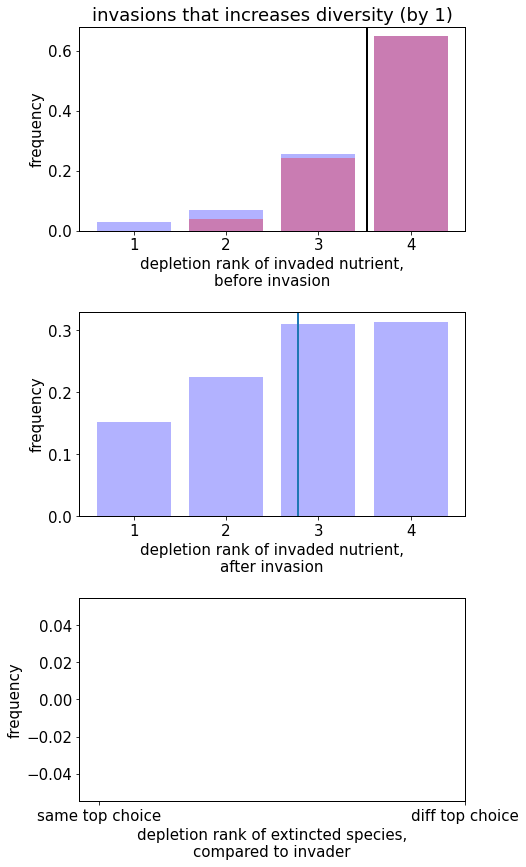

In [39]:
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=0.3))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=0.4) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[2, 0])

xp1s = [[j for j in i] for i in xs]
xdiffs = xp1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)

invaderPrefOrder = []
depletionBefore = []
extinctBugPrefOrder = []
depletionAfter = []
jumps = []
occupancy = []
cutoff = 150
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            invaderPrefOrder.append(preference_list[invader // Size])
            
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            
            bugsBefore = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            bugsAfter = allOutputs[Nr-7][xcoords_idx]['details'][1][step+1]
            extinctBug = [bug for bug in bugsBefore if bug not in bugsAfter]
            extinctBugPrefOrder.append([preference_list[bug//Size] for bug in extinctBug])
            
            invaderTopChoice = preference_list[invader // Size][0]
            jumps.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1].index(invaderTopChoice) - allOutputs[Nr-7][xcoords_idx]['details'][2][step].index(invaderTopChoice))
            
            claimed = [preference_list[bug // Size][0] for bug in bugsBefore]
            occupancy.append(invaderTopChoice in claimed)
        
invadedRes = [depletionBefore[idx].index(i) for idx, i in enumerate([j[0] for j in invaderPrefOrder])]
UnclaimedInvRes = [invadedRes[idx] for idx,i in enumerate(occupancy) if i == 0]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax1, invadedRes, **kwargs)
kwargs = {'color':'r', 'alpha': 0.3}
barnormed(ax1, UnclaimedInvRes, norm = len(UnclaimedInvRes)/len(invadedRes), **kwargs)
#sns.distplot(invadedRes, norm_hist=1, kde = 0, ax = ax1)
ax1.set_xlabel('depletion rank of invaded nutrient,\nbefore invasion')
ax1.set_ylabel('frequency')
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels([1, 2, 3, 4])
ax1.axvline(np.mean(invadedRes), color = 'k')
ax1.set_title("invasions that increases diversity (by 1)")

invInNewDep = [depletionAfter[idx].index(i) for idx, i in enumerate([j[0] for j in invaderPrefOrder])]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax2, invInNewDep, **kwargs)
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels([1, 2, 3, 4])
ax2.set_xlabel('depletion rank of invaded nutrient,\nafter invasion')
ax2.set_ylabel('frequency')
ax2.axvline(np.mean(invInNewDep))

# sns.distplot(rankOfG1, norm_hist=1, kde = 0, ax = ax3)
# ax2.set_xlabel('rank of invader\'s top choice growth rate')
# ax3.set_ylabel('frequency')
# ax3.axvline(np.mean(rankOfG1))

victimDiff = []
for idx, i in enumerate([j[0] for j in invaderPrefOrder]):
    for lst in extinctBugPrefOrder[idx]:
        victimDiff.append(-depletionBefore[idx].index(lst[0]) + depletionBefore[idx].index(i))
victimDiff = [i != 0 for i in victimDiff]
kwargs = {'color':'b', 'alpha': 0.3}
barnormed(ax3, victimDiff, **kwargs)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['same top choice', 'diff top choice'])
ax3.set_xlabel('depletion rank of extincted species,\ncompared to invader')
ax3.set_ylabel('frequency')
ax3.axvline(np.mean(victimDiff))

So it kind of justifies the previous guess.

- The invasions that increase the diversity gets its invasion success due to the time profiles. It seldom challenges the best champion. 
- The invasions that maintain diversity tend to invade in later depleted resources and move its depletion earlier.
- The invasions that decrease diversity happen basically regardless of the invaded nutrient being depleted earlier. Such invaders are better champions than the residents in the system.

In [46]:
gIncr = []

xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != -3):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
cutoff = 15
gIncr.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            gInv = allInputs[Nr-7][xcoords_idx]['G'][invader][preference_list[invader // Size][0]]
            residents = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            gMeans = np.mean([allInputs[Nr-7][xcoords_idx]['G'][i][preference_list[i // Size][0]] for i in residents])
            gIncr[-1].append((gInv-gMeans)/gMeans)

xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != -2):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
cutoff = 15
gIncr.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            gInv = allInputs[Nr-7][xcoords_idx]['G'][invader][preference_list[invader // Size][0]]
            residents = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            gMeans = np.mean([allInputs[Nr-7][xcoords_idx]['G'][i][preference_list[i // Size][0]] for i in residents])
            gIncr[-1].append((gInv-gMeans)/gMeans)

xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != -1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
cutoff = 15
gIncr.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            gInv = allInputs[Nr-7][xcoords_idx]['G'][invader][preference_list[invader // Size][0]]
            residents = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            gMeans = np.mean([allInputs[Nr-7][xcoords_idx]['G'][i][preference_list[i // Size][0]] for i in residents])
            gIncr[-1].append((gInv-gMeans)/gMeans)
            
xp0s = [[j for j in i] for i in xs]
xdiffs = xp0s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 0):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
cutoff = 15
gIncr.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            gInv = allInputs[Nr-7][xcoords_idx]['G'][invader][preference_list[invader // Size][0]]
            residents = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            gMeans = np.mean([allInputs[Nr-7][xcoords_idx]['G'][i][preference_list[i // Size][0]] for i in residents])
            gIncr[-1].append((gInv-gMeans)/gMeans)
            
xp1s = [[j for j in i] for i in xs]
xdiffs = xp1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
cutoff = 15
gIncr.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            gInv = allInputs[Nr-7][xcoords_idx]['G'][invader][preference_list[invader // Size][0]]
            residents = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            gMeans = np.mean([allInputs[Nr-7][xcoords_idx]['G'][i][preference_list[i // Size][0]] for i in residents])
            gIncr[-1].append((gInv-gMeans)/gMeans)

Text(0, 0.5, '$(g_{inv}-g_{prev})/g_{prev}$')

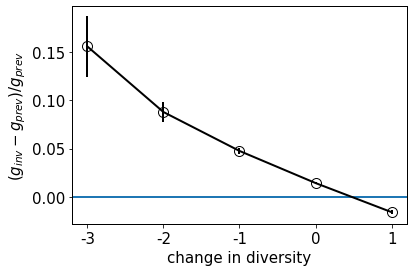

In [55]:
plt.errorbar(range(1, 6), [np.mean(i) for i in gIncr], yerr=[sem(i) for i in gIncr], marker = 'o', markersize=10, mfc = 'none', color = 'k')
plt.axhline(0)
plt.xticks(range(1, 6), labels=[-3, -2, -1, 0, 1])
plt.xlabel('change in diversity')
plt.ylabel('$(g_{inv}-g_{prev})/g_{prev}$')

In [207]:
topChange = []

xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff > -1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
cutoff = 150
topChange.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            topChange[-1].append(depletionAfter[-1][0] != depletionBefore[-1][0]) 
            
xp0s = [[j for j in i] for i in xs]
xdiffs = xp0s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 0):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
topChange.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            topChange[-1].append(depletionAfter[-1][0] != depletionBefore[-1][0]) 
            
xp1s = [[j for j in i] for i in xs]
xdiffs = xp1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != 1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)
            
topChange.append([])
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            topChange[-1].append(depletionAfter[-1][0] != depletionBefore[-1][0]) 

Text(0.5, 0, 'change in diversity')

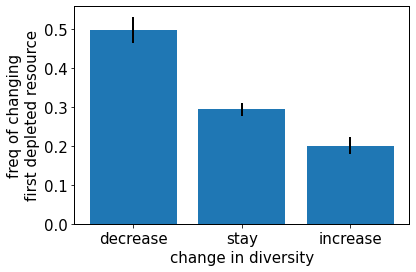

In [214]:
plt.bar(range(1, 4), [np.mean(i) for i in topChange], yerr=[sem(i) for i in topChange])
plt.xticks([1,2,3], ['decrease', 'stay', 'increase'])
plt.ylabel('freq of changing\nfirst depleted resource')
plt.xlabel('change in diversity')

In [ ]:
xm1s = [[j for j in i] for i in xs]
xdiffs = xm1s
for xcoords_idx, lst in enumerate(xdiffs):
    for idx,step in enumerate(invasionOrdersTime[Nr-7][xcoords_idx][:-1]):
        divdiff = len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx+1]) - len(allOutputs[Nr-7][xcoords_idx]['details'][1][idx])
        if(divdiff != -1):
            a = xs[xcoords_idx][idx]
            xdiffs[xcoords_idx].remove(a)

invaderPrefOrder = []
depletionBefore = []
extinctBugPrefOrder = []
depletionAfter = []
jumps = []
occupancy = []
cutoff = 150
            
for xcoords_idx, xcoord in enumerate(xdiffs):
    for idx, i in enumerate(xcoord):
        if i > cutoff:
            step = invasionOrdersTime[Nr-7][xcoords_idx].index(xcoord[idx]-1)
            
            invader = allOutputs[Nr-7][xcoords_idx]['details'][-1][step+1]
            invaderPrefOrder.append(preference_list[invader // Size])
            
            depletionBefore.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step])
            depletionAfter.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1])
            
            bugsBefore = allOutputs[Nr-7][xcoords_idx]['details'][1][step]
            bugsAfter = allOutputs[Nr-7][xcoords_idx]['details'][1][step+1]
            extinctBug = [bug for bug in bugsBefore if bug not in bugsAfter]
            extinctBugPrefOrder.append([preference_list[bug//Size] for bug in extinctBug])
            
            invaderTopChoice = preference_list[invader // Size][0]
            jumps.append(allOutputs[Nr-7][xcoords_idx]['details'][2][step+1].index(invaderTopChoice) - allOutputs[Nr-7][xcoords_idx]['details'][2][step].index(invaderTopChoice))
            
            claimed = [preference_list[bug // Size][0] for bug in bugsBefore]
            occupancy.append(invaderTopChoice in claimed)